# Facial Emotion Data Preparer

## Import the General Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Relevant Image Libraries

In [2]:
import cv2
import os
from PIL import Image
import numpy as np
import joblib  # Import joblib for saving and loading images

## Load the Cached Train and Test Images

In [3]:
# Load the cached images dataset
cached_img_train = joblib.load('cached_img_train.pkl')
cached_img_test = joblib.load('cached_img_test.pk1')

# Checking the unit data in the dataset
print(f'Loaded cached images of shape {cached_img_train[10][0].shape}')
print(f'Target of the image = {cached_img_train[10][1]}')

Loaded cached images of shape (48, 48)
Target of the image = angry


### Example of Image Loaded

In [4]:
#Func to display a single image
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

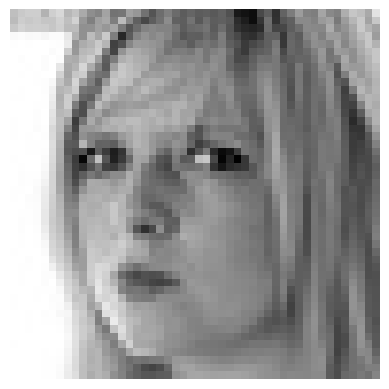

In [5]:
#Display the first image in train images
show_image(cached_img_train[10][0])

## Exploring and/or Modifying the Image Data

### Normalize the Three Image Datasets

In [6]:
#Function normalizes img from 0 to 1
def normalize_images(img_arr):
    max_value = np.max(img_arr)
    return np.array(img_arr) / max_value  # Normalize to [0, 1]

In [7]:
#Check if an image is normalized else normalize it.
def check_n_normalize(image):
    #Gets the highest and lowest values in the given image
    min_value = np.min(image)
    max_value = np.max(image)
    #print("====================================")
    #print(f'Min value: {min_value}, Max value: {max_value}')

    # Check if the image dataset min and max value are between 0 and 1(0 and 1 included) 
    #else normalize the dataset.
    
    if min_value >= 0 and max_value <= 1:
        #print("Images are normalized to [0, 1]")
        return image
    else:
        #print("Images are not normalized.")
        return normalize_images(image)


In [8]:
#Normalize all the train, validation and test image dataset
for i in range(0, len(cached_img_train)):
    cached_img_train[i][0] = check_n_normalize(cached_img_train[i][0])
    
for i in range(0, len(cached_img_test)):
    cached_img_test[i][0] = check_n_normalize(cached_img_test[i][0])

#Show a single example
print("min_value = ", np.min(cached_img_train[5][0]))
print("max_value = ", np.max(cached_img_train[5][0]))

min_value =  0.0
max_value =  1.0


In [9]:
normed_img_train = cached_img_train.copy()
normed_img_test = cached_img_test.copy()

### Data Balancing Via Rotating and Flipping the Some of the Image Data

The image data in the dataset can be rotated and flipped to improve the CNN model generalization and to generate more images from the existing dataset.

10% of the highest emotion set(the happiness set as of right now) in the training and test dataset will be rotated(at given angles) and flipped (horizontally). This 10% will be added to the highest set increasing its data size by 10%.

The other sets(angry, disgust, fear, e.t.c.) will have an amount be rotated, flipped, and added to their original set. This amount will be equal to the 10% of the highest emotion set(happiness set). Thus bringing all the number of images in the sets in the entire dataset(train and test) to be an equal amount with respect to their dataset(train or test). 

At the end, all rotated and flipped generated data will be added back to their original dataset increasing their size and image variations. These rotation and flipped percentages were chosen to be small but significant enough.

The angles selected will be a range of (-10, 10)(0 excluded as most images are already upright)

In [10]:
def rotate_image(img_array, mean=0, std_dev=30, angle_limit=(-10, 10)):
    #Rotation angles are randomly selected from a gaussian distribution that excludes zero from being selected.
    #The small standard deviation of 30 was chosen to increase the chances that angles that slightly rotate 
    #the image from its upright positions are chosen.
    #The angle limit of(-10, 10) was chosen to mimic the natural tilting of the human head. Where an upright head is at angle 0.

    #Angle chosen to represent an upright human head.
    UPRIGHT_ANGLE = 0
    
    # Convert numpy array to PIL Image
    img = Image.fromarray(img_array)
    
    # Generate a non-zero random angle within the specified range of ()
    angle = int(random.uniform(*angle_limit))

    #If 0 or any angle past the limits are are chosen
    #Randomly chose another angle within a normal distribution with a standard deviation of 30
    while angle == UPRIGHT_ANGLE or angle < angle_limit[0] or angle > angle_limit[1]:
        angle = random.gauss(mean, std_dev)

    
    # Rotate the image
    rotated_img_np = img.rotate(angle, resample=Image.BICUBIC, expand=True)

    # Convert to numpy array
    #rotated_img_np = np.array(rotated_img)

    # Apply padding tofill up black shades from rotating
    #padded_rotated_img_np = np.pad(
    #rotated_img_np,
    #pad_width=((5, 5), (5, 5)),  # adjust padding as needed
    #mode='reflect'
    #)
    # Pad the image to fill black borders (after rotation)
    #padded_rotated_img_np = np.pad(
     #   rotated_img_np,
     #   pad_width=((5, 5), (5, 5)),  # adjust padding as needed (5 pixels on each side)
     #   mode='reflect'  # use 'reflect' to avoid black borders
    #)
    
    # Convert back to PIL Image
    #rotated_padded_img = Image.fromarray(rotated_padded_img_np)
    
    #Resize the img
    #img_rotated_resized = padded_rotated_img.resize((48, 48))
    img_rotated_resized = rotated_img_np.resize((48, 48))
    
    # Convert back to numpy array
    return np.array(img_rotated_resized), angle


In [11]:
def horizontal_flip_image(img_array):
    #50% chance to Flip the image horizontally.
    
     # Convert numpy array to PIL Image
    img = Image.fromarray(img_array)

    # 50% chance to flip the image horizontally
    if random.choice([True, False]):
        # Flip the image horizontally
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        
    # Convert back to numpy array
    return np.array(img)

Rotated angle =  -6
Rotated img shape =  (48, 48)


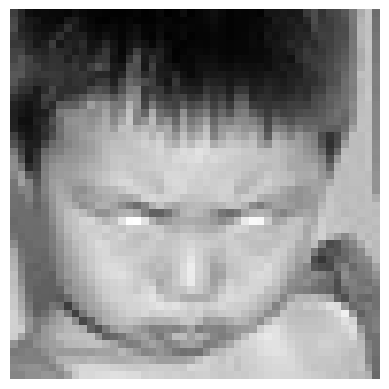

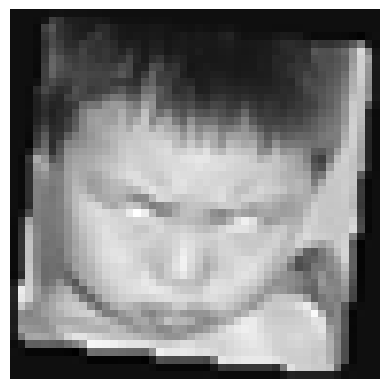

In [12]:
# testing the rotation and the flipping of the images
train_img1 = normed_img_train[0][0]

rotated_train_img1, rotated_angle = rotate_image(train_img1)
flipped_rotated_train_img1 = horizontal_flip_image(rotated_train_img1)

print("Rotated angle = ", rotated_angle)
print("Rotated img shape = ", flipped_rotated_train_img1.shape)
show_image(train_img1)
show_image(flipped_rotated_train_img1)

#### Data Balancing of Train and Test Datasets
#### --------------------------------------------------

#### Getting the Numerical Limit for the Generated Data

In [13]:
# Func to get both the emotion class with the highest observations and its number of observations.

#counter is used to count the number of times each unique emotion is present in the dataset.
from collections import Counter

def most_frequent_emotion(img_dataset):
    
    # Use Counter to count occurrences of each unique emotion
    counter = Counter(img_dataset)
    
    # Get the most highest count emotion and its count
    # The argument 1 means we only want the top result.
    # [0] returns a tuple of the name of the emotion and its count
    most_common = counter.most_common(1)[0]
    
    return most_common

In [14]:
#Get the emotion column for both the train and test datset for use with the counter function
img_train_emotions = [row[1] for row in normed_img_train]
img_test_emotions = [row[1] for row in normed_img_test]

#For both the train and test emotion columns, get the name and the highest count for the emotion with the most observations.
highest_train_emotion, train_emotion_count = most_frequent_emotion(img_train_emotions)
highest_test_emotion, test_emotion_count = most_frequent_emotion(img_test_emotions)

#Display the result.
print(f'{highest_train_emotion} is the emotion with the highest count of {train_emotion_count} in the train dataset')
print(f'{highest_test_emotion} is the emotion with the highest count of {test_emotion_count} in the test dataset')

happy is the emotion with the highest count of 7215 in the train dataset
happy is the emotion with the highest count of 1774 in the test dataset


In [15]:
#Get the emotion column for the train datset for use with the counter function
#img_train_emotions = [row[1] for row in normed_img_train]

#For the train emotion columns, get the name and the highest count for the emotion with the most observations.
#highest_train_emotion, train_emotion_count = most_frequent_emotion(img_train_emotions)

#Display the result.
#print(f'{highest_train_emotion} is the emotion with the highest count of {train_emotion_count} in the train dataset')

In [16]:
#Set a max limit for generating new img data from rotating and flipping.
#This max limit is based on the highest count for the emotion with the most observations.
TRAIN_IMG_GENERATIVE_LIMIT = int(train_emotion_count + 0.1*train_emotion_count)
TEST_IMG_GENERATIVE_LIMIT = int(test_emotion_count + 0.1*test_emotion_count)

print(f'Number of observations after adding the new generated data to their respective emotion classes in the train dataset is {TRAIN_IMG_GENERATIVE_LIMIT}')

print(f'Number of observations after adding the new generated data to their respective emotion classes in the test dataset is {TEST_IMG_GENERATIVE_LIMIT}')

Number of observations after adding the new generated data to their respective emotion classes in the train dataset is 7936
Number of observations after adding the new generated data to their respective emotion classes in the test dataset is 1951


In [17]:
#Set a max limit for generating new img data from rotating and flipping.
#This max limit is based on the highest count for the emotion with the most observations.
#TRAIN_IMG_GENERATIVE_LIMIT = int(train_emotion_count + 0.1*train_emotion_count)

#print(f'Number of observations after adding the new generated data to their respective emotion classes in the train dataset is {TRAIN_IMG_GENERATIVE_LIMIT}')

#### Training Data Balancing

In [18]:
#Func for splitting the dataset and grouping by their unique emotions.
#Returns a dict: A dictionary where keys are unique values in the specified column and values are numpy arrays
#containing rows corresponding to each unique value.
def split_dataset_by_emotion(data, column_index):
    
   # Create a dictionary to hold the split datasets
    split_datasets = {}
    
    # Iterate over each row in the data
    for row in data:
        # Get the value in the specified column
        key = row[column_index]
        
        # Append the row to the corresponding key in the dictionary
        if key not in split_datasets:
            split_datasets[key] = []
        split_datasets[key].append(row)
    
    return split_datasets

#### Train Data Balancing

In [19]:
# Split the dataset by emotions (index 1)
split_train_data = split_dataset_by_emotion(normed_img_train, column_index=1)

# Display the results
print("In the Train Dataset")
print("-------------------------\n")
print(f"TRAIN_IMG_GENERATIVE_LIMIT = {TRAIN_IMG_GENERATIVE_LIMIT}\n")

#Generate the new image data for each emotion class up to the IMG_GENERATIVE_LIMIT.
#Get the emotion catergory key and subset value pair[image, target] from the dictionary.
for category, subset in split_train_data.items():
    #Display how much observation were in the emotion class before adding the generated image data via rotation and flipping.
    print(f"In Category {category}:\n There were {len(subset)} observations.")

    #Keep a track record of the number of new data generated
    num_of_new_data = 0
    #Get the number of the observations in the emotion class before adding new data to said class.
    old_len_subset = len(subset)
    
    while num_of_new_data < (TRAIN_IMG_GENERATIVE_LIMIT - old_len_subset):
        random_index = np.random.choice(len(subset))  # Get a random index
        random_row = subset[random_index]  # Use the random index to pick the row containing the image
    
       
        #Fill the emotion subset with new generated image data until the total number of obeservations
        #in that subset is equal to the TRAIN_IMG_GENERATIVE_LIMIT.   
            
        #Rotate and flip the image in the subset
        rotated_img, rotation_angle = rotate_image(random_row[0])# Rotate the image in the row and discard the rotation angle
       
        flipped_rotated_img = np.array(horizontal_flip_image(rotated_img))
        #flipped_img = np.array(horizontal_flip_image(random_row[0]))
        
        split_train_data[category].append([flipped_rotated_img, category] )
        num_of_new_data += 1
    print("num_of_new_data = ", num_of_new_data)
        
    print(f"There are now {len(subset)} observations.\n")

In the Train Dataset
-------------------------

TRAIN_IMG_GENERATIVE_LIMIT = 7936

In Category angry:
 There were 3995 observations.
num_of_new_data =  3941
There are now 7936 observations.

In Category disgust:
 There were 436 observations.
num_of_new_data =  7500
There are now 7936 observations.

In Category fear:
 There were 4097 observations.
num_of_new_data =  3839
There are now 7936 observations.

In Category happy:
 There were 7215 observations.
num_of_new_data =  721
There are now 7936 observations.

In Category neutral:
 There were 4965 observations.
num_of_new_data =  2971
There are now 7936 observations.

In Category sad:
 There were 4830 observations.
num_of_new_data =  3106
There are now 7936 observations.

In Category surprise:
 There were 3171 observations.
num_of_new_data =  4765
There are now 7936 observations.



#### Test Data Balancing

In [20]:

# Split the datset by emotions (index 1)
split_test_data = split_dataset_by_emotion(normed_img_test, column_index=1)

# Display the results
print("In the Test Dataset")
print("-------------------------\n")
print(f"TEST_IMG_GENERATIVE_LIMIT = {TEST_IMG_GENERATIVE_LIMIT}\n")

#Generate the new image data for each emotion class up to the IMG_GENERATIVE_LIMIT.
#Get the emotion catergory key and subset value pair[image, target] from the dictionary.
for category, subset in split_test_data.items():
    #Display how much observation were in the emotion class before adding the generated image data via rotation and flipping.
    print(f"In Category {category}:\n There were {len(subset)} observations.")

    #Keep a track record of the number of new data generated
    num_of_new_data = 0
    #Get the number of the observations in the emotion class before adding new data to said class.
    old_len_subset = len(subset)
    
    while num_of_new_data < (TEST_IMG_GENERATIVE_LIMIT - old_len_subset):
        random_index = np.random.choice(len(subset))  # Get a random index
        random_row = subset[random_index]  # Use the random index to pick the row containing the image
    
       
        #Fill the emotion subset with new generated image data until the total number of obeservations
        #in that subset is equal to the TRAIN_IMG_GENERATIVE_LIMIT.   
            
        #Rotate and flip the image in the subset
        rotated_img, rotation_angle = rotate_image(random_row[0])# Rotate the image in the row and discard the rotation angle
        rotated_img = np.array(rotated_img)
        flipped_rotated_img = np.array(horizontal_flip_image(rotated_img))
        #flipped_img = np.array(horizontal_flip_image(random_row[0]))
        
        split_test_data[category].append([flipped_rotated_img, category] )
        num_of_new_data += 1
    print("num_of_new_data = ", num_of_new_data)
        
    print(f"There are now {len(subset)} observations.\n")
   
        

In the Test Dataset
-------------------------

TEST_IMG_GENERATIVE_LIMIT = 1951

In Category angry:
 There were 958 observations.
num_of_new_data =  993
There are now 1951 observations.

In Category disgust:
 There were 111 observations.
num_of_new_data =  1840
There are now 1951 observations.

In Category fear:
 There were 1024 observations.
num_of_new_data =  927
There are now 1951 observations.

In Category happy:
 There were 1774 observations.
num_of_new_data =  177
There are now 1951 observations.

In Category neutral:
 There were 1233 observations.
num_of_new_data =  718
There are now 1951 observations.

In Category sad:
 There were 1247 observations.
num_of_new_data =  704
There are now 1951 observations.

In Category surprise:
 There were 831 observations.
num_of_new_data =  1120
There are now 1951 observations.



In [21]:
#Convert the dictionary back to a list of images and emotion target
def flatten_dict_to_list_with_category(split_data):
    # Create an empty list to store the final flattened rows
    flattened_list = []

    # Iterate over each category and its corresponding list of rows
    for category, subset in split_data.items():
        # For each row in the subset, append a tuple (image, category)
        for row in subset:
            flattened_list.append([row[0], category])  # row[0] is the image, category is the label

    return flattened_list

size of CNN_img_train =  55552
target =  neutral


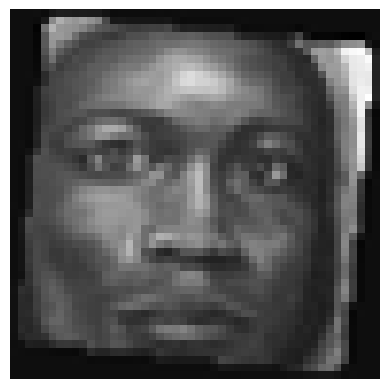

In [22]:

CNN_ready_img_train = flatten_dict_to_list_with_category(split_train_data)
CNN_ready_img_test = flatten_dict_to_list_with_category(split_test_data)

print("size of CNN_img_train = ", len(CNN_ready_img_train))

random_index = np.random.choice(len(CNN_ready_img_train))  # Get a random index
random_train_img = CNN_ready_img_train[random_index][0]

print("target = ", CNN_ready_img_train[random_index][1])
show_image(random_train_img)


#### Splitting the Validation Set from the Training Set 

In [23]:
# Ensure reproducible random selection
np.random.seed(42)

# Calculate the split index
split = int(0.8 * len(CNN_ready_img_train))

# Shuffle the dataset indices randomly
shuffled_indices = np.random.permutation(len(CNN_ready_img_train))

# Use the first 80% for training and the remaining 20% for validation
train_indices = shuffled_indices[:split]
val_indices = shuffled_indices[split:]

# Create train and validation sets
CNN_ready_img_train_split = [CNN_ready_img_train[i] for i in train_indices]
CNN_ready_img_val_split = [CNN_ready_img_train[i] for i in val_indices]

CNN_ready_img_train = CNN_ready_img_train_split.copy()
CNN_ready_img_val = CNN_ready_img_val_split.copy()

print("size of CNN_img_train = ", len(CNN_ready_img_train))
print("size of CNN_img_val = ", len(CNN_ready_img_val))

size of CNN_img_train =  44441
size of CNN_img_val =  11111


## Exporting the Data For Convolutional Neural Network Training

In [24]:
joblib.dump(CNN_ready_img_train, 'CNN_ready_img_train.pkl')
joblib.dump(CNN_ready_img_val, 'CNN_ready_img_val.pkl')
joblib.dump(CNN_ready_img_test, 'CNN_ready_img_test.pk1')

['CNN_ready_img_test.pk1']